<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h1 style="color: #A2AAAD; margin: 50px auto 0;">Proximal Policy Optimization Data Analysis</h1>
    <p style="color: #A2AAAD; margin: 10px auto 50px; font-size: 20px; height:80%;">Chandler Scott</p>
</div>

<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 20px auto; line-height:100%;">
        Read data into DataFrame
    </h3>
</div>

In [494]:
import pandas as pd


play_file = 'play.log'
train_file = 'train.log'
untrained_walker_file = 'untrained_walker.log'
trained_walker_file = 'trained_walker.log'
untrained_lunar_file = 'untrained_lunar.log'
trained_lunar_file = 'trained_lunar.log'

play_df = pd.read_csv(f'out/{play_file}')
train_df = pd.read_csv(f'out/{train_file}')

trained_walker_df = pd.read_csv(f'out/{trained_walker_file}', header=0)
untrained_walker_df = pd.read_csv(f'out/{untrained_walker_file}')

trained_lunar_df = pd.read_csv(f'out/{trained_lunar_file}', header=0)
untrained_lunar_df = pd.read_csv(f'out/{untrained_lunar_file}')


def extract_values(df, column):
    return df[column].str.extract(r'(-?\d+\.?\d*)$').astype(float)


play_df = extract_values(play_df, 'Values')
train_df = extract_values(train_df, 'Values')

trained_walker_df = extract_values(trained_walker_df, 'cumulative_reward')
untrained_walker_df = extract_values(untrained_walker_df, 'cumulative_reward')

trained_lunar_df = extract_values(trained_lunar_df, 'cumulative_reward')
untrained_lunar_df = extract_values(untrained_lunar_df, 'cumulative_reward')


<div style="color: #FFC72C; text-align: center; border-top: 1px solid #A2AAAD; border-bottom: 1px solid #A2AAAD;">
    <h3 style="color: #A2AAAD; margin: 20px auto; line-height:100%;">
        Plot Learning over Time
    </h3>
</div>

23.566666666666666 < 356.8


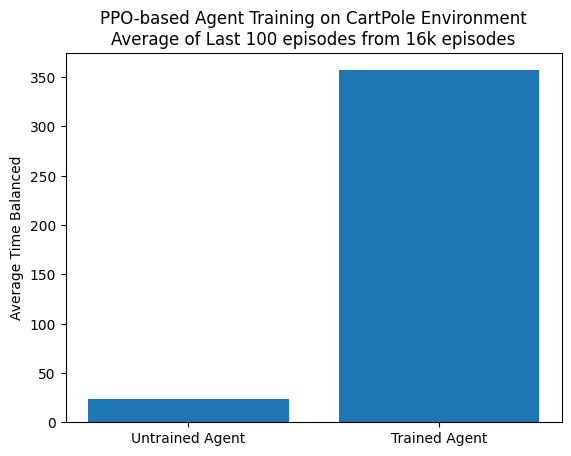

In [495]:
## Cartpole ##

import matplotlib.pyplot as plt
# n = group size
n = 30

last_100_play = play_df.tail(n)
last_100_train = train_df.tail(n)

last_100_play[0]

trained_avg = last_100_play[0].mean()
train_avg = last_100_train[0].mean()
train_max = last_100_train[0].max()


print(f'{trained_avg} < {train_avg}')


# Plot the average
plt.bar(['Untrained Agent', 'Trained Agent'], [trained_avg, train_avg])
plt.ylabel('Average Time Balanced')
plt.title('PPO-based Agent Training on CartPole Environment\nAverage of Last 100 episodes from 16k episodes')


plt.show()

max reward: 116.2252397138992
untrained(-100.70835246544544) < trained(-40.78346929844268)


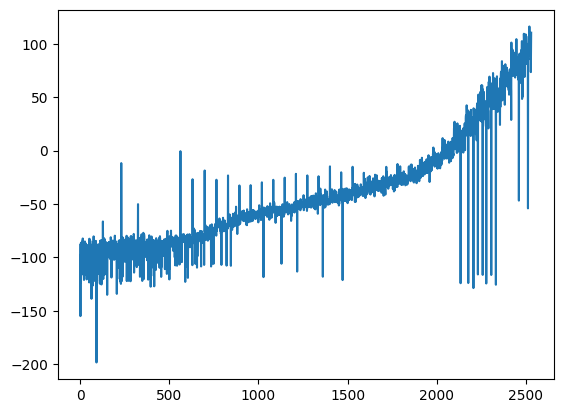

In [501]:
## Walker ##
import matplotlib.pyplot as plt
# n = group size
n = 30

trained_walker = trained_walker_df[0].tail(n)
untrained_walker = untrained_walker_df[0].tail(n)

trained_avg = trained_walker.mean()
untrained_avg = untrained_walker.mean()

print(f'max reward: {trained_walker.max()}')
print(f'untrained({untrained_avg}) < trained({trained_avg})')


# Plot the average
plt.bar(['Untrained Agent', 'Trained Agent'], [untrained_avg, trained_avg])
plt.ylabel('Average Time Balanced')
plt.title(f'PPO-based Agent Training on BiPedal Walker Environment\nAverage of Last {n} episodes from {trained_walker_df.size} episodes')


plt.show()

max reward: 94.1389034332855
untrained(-171.6170647654011) < trained(-116.36931517941575)


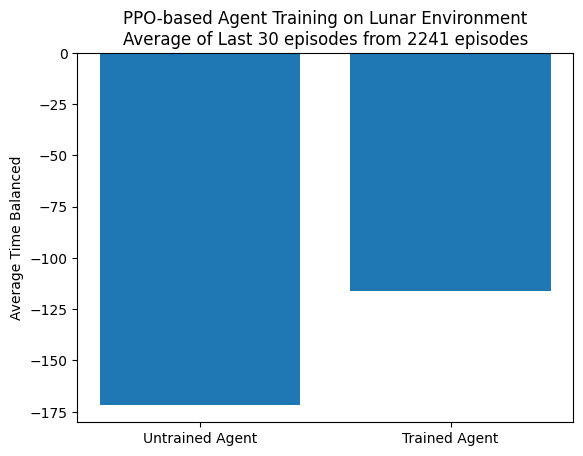

In [497]:
## Lunar ##

import matplotlib.pyplot as plt
# n = group size
n = 30

trained_lunar = trained_lunar_df[0].tail(n)
untrained_lunar = untrained_lunar_df[0].tail(n)

trained_avg = trained_lunar.mean()
untrained_avg = untrained_lunar.mean()

print(f'max reward: {trained_lunar.max()}')
print(f'untrained({untrained_avg}) < trained({trained_avg})')


# Plot the average
plt.bar(['Untrained Agent', 'Trained Agent'], [untrained_avg, trained_avg])
plt.ylabel('Average Time Balanced')
plt.title(f'PPO-based Agent Training on Lunar Environment\nAverage of Last {n} episodes from {trained_lunar_df.size} episodes')


plt.show()